## Importing Required Libraries Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading Data from Source

In [3]:
path = r'D:\Machine_Learning\Datasets\01_Combined Cycle Power Plant.xlsx'

AT (Ambient Temperature) – The temperature outside in degrees Celsius.

V (Exhaust Vacuum) – The vacuum (pressure) in cm Hg.

AP (Ambient Pressure) – The atmospheric pressure in millibar.

RH (Relative Humidity) – The relative humidity in percentage (%).

PE (Power Output / Energy Output) – The net hourly electrical energy output of the plant in megawatts (MW).

In [6]:
df = pd.read_excel(path)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [9]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## Visualization

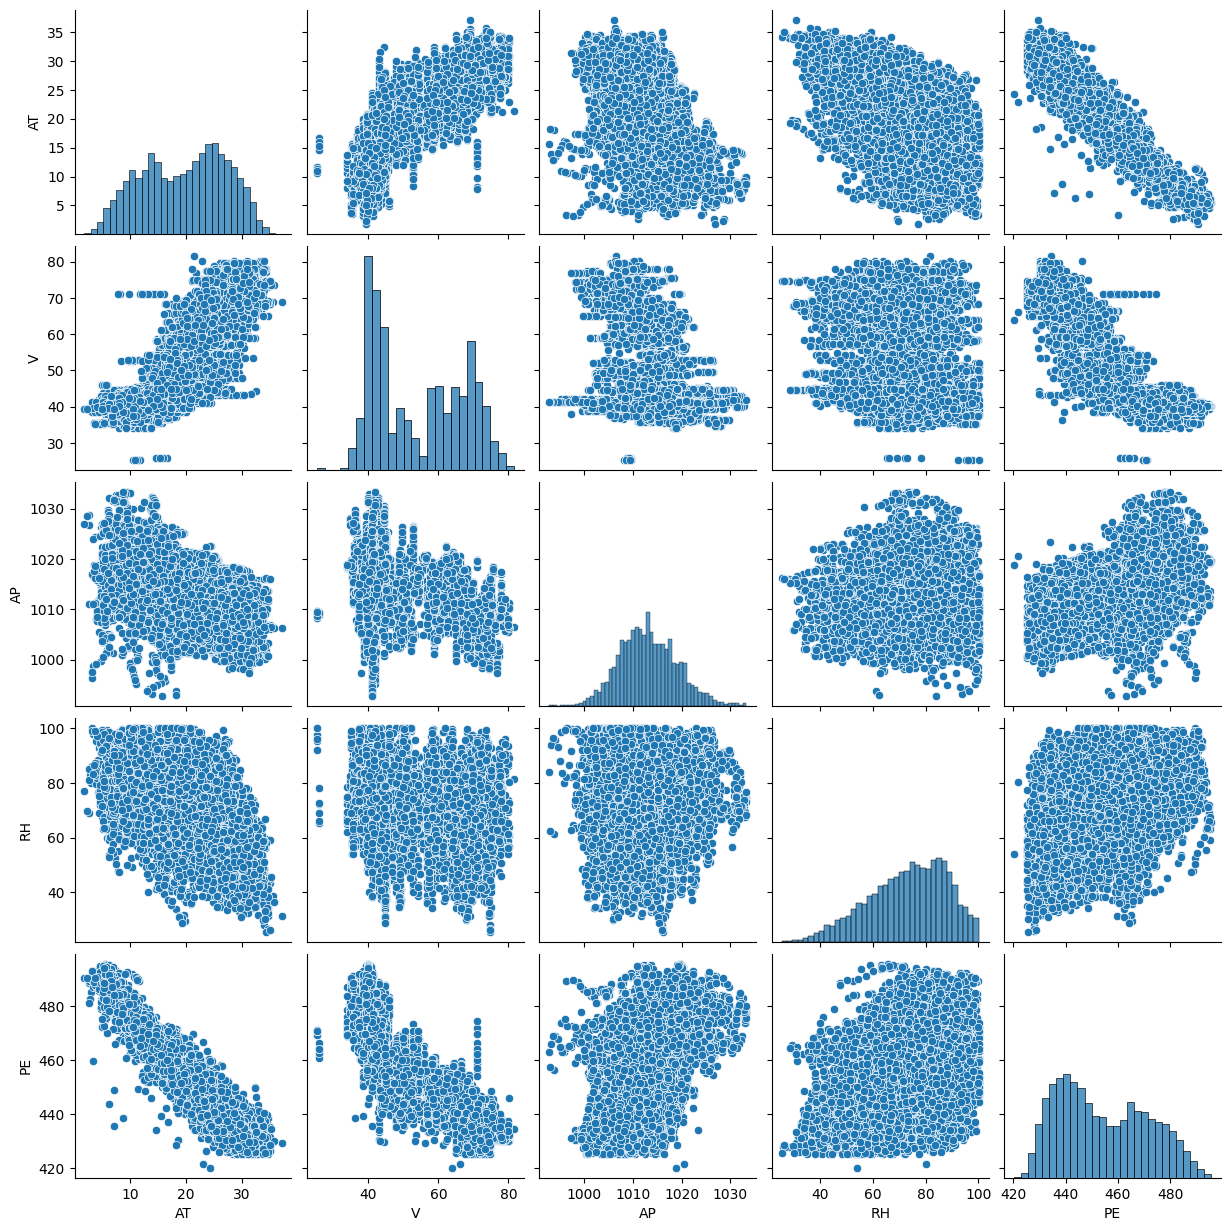

In [12]:
sns.pairplot(df)

## Visualize Data point moreclosely 

Text(0, 0.5, 'Power Output / Energy Output')

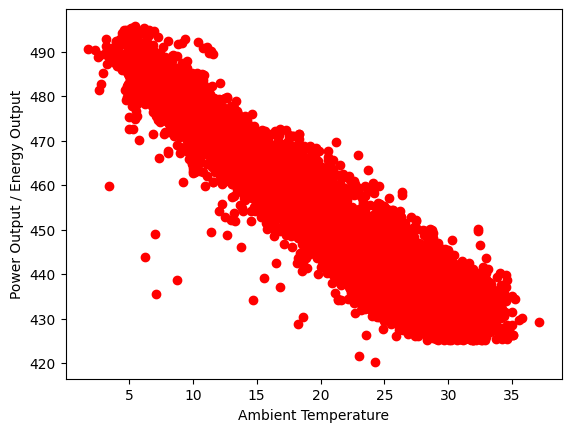

In [16]:
plt.scatter(df['AT'],df['PE'],color='r')
plt.xlabel("Ambient Temperature")
plt.ylabel("Power Output / Energy Output")

Text(0, 0.5, 'Power Output / Energy Output')

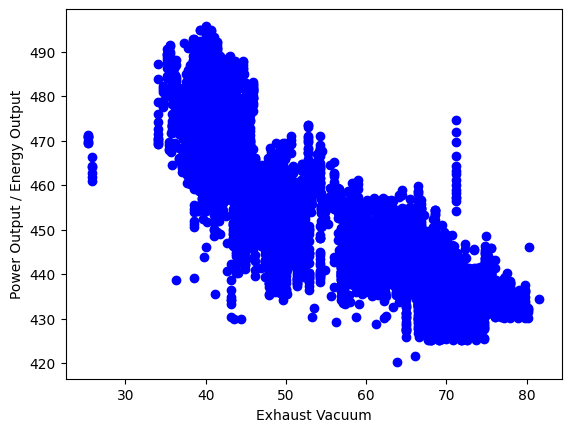

In [18]:
plt.scatter(df['V'],df['PE'],color='b')
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Power Output / Energy Output")

Text(0, 0.5, 'Power Output / Energy Output')

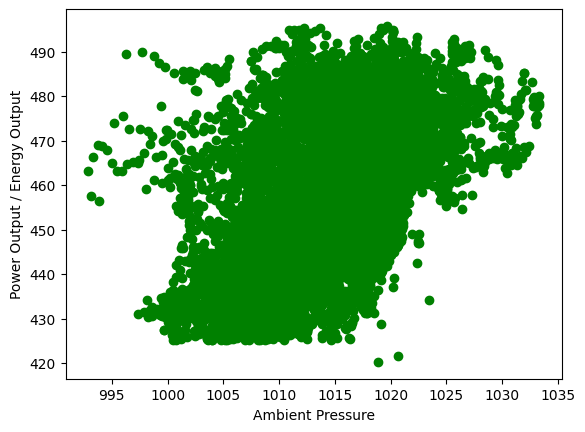

In [19]:
plt.scatter(df['AP'],df['PE'],color='g')
plt.xlabel("Ambient Pressure")
plt.ylabel("Power Output / Energy Output")

Text(0, 0.5, 'Power Output / Energy Output')

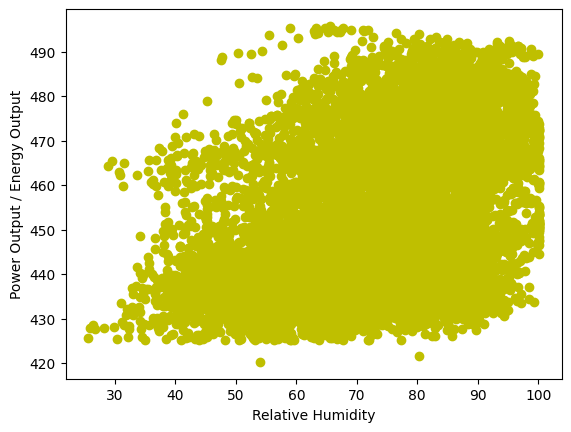

In [20]:
plt.scatter(df['RH'],df['PE'],color='y')
plt.xlabel("Relative Humidity")
plt.ylabel("Power Output / Energy Output")

## Seperating Feature for Dependent and Independent Features

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
X.head()


,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [24]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

## Train Test Split

In [26]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=42)

In [27]:
X_train

,AT,V,AP,RH
2058,8.05,38.38,1021.14,86.39
8042,6.16,38.50,1012.83,93.68
7612,24.56,63.21,1013.79,82.38
1166,12.55,38.91,1012.58,75.44
3597,29.24,64.33,1011.49,65.08
...,...,...,...,...
5734,23.39,61.87,1010.35,48.91
5191,11.63,40.55,1022.89,87.12
5390,27.79,69.23,1012.86,45.71
860,12.26,41.50,1014.87,89.41


In [28]:
y_train

2058    482.17
8042    490.92
7612    444.34
1166    474.35
3597    440.12
         ...  
5734    444.03
5191    474.67
5390    435.06
860     471.13
7270    472.43
Name: PE, Length: 7176, dtype: float64

In [29]:
X_test

,AT,V,AP,RH
2513,19.64,48.06,1014.81,74.96
9411,28.26,69.23,1013.01,42.10
8745,27.98,67.17,1007.32,75.29
9085,28.64,69.23,1013.11,37.13
4950,9.34,38.08,1019.56,67.74
...,...,...,...,...
4427,7.98,39.61,1018.57,77.04
3297,27.82,76.09,1007.83,76.07
1244,16.77,49.39,1018.61,95.86
3614,12.25,44.58,1016.47,81.15


In [30]:
y_test

2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
         ...  
4427    479.78
3297    434.52
1244    459.38
3614    475.24
5651    450.64
Name: PE, Length: 2392, dtype: float64

In [32]:
sns.regplot(df['AT'],df['PE'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given